In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

%matplotlib inline

In [2]:
from pathlib import Path

data= Path('../data')

#라이브러리 불러오기

#입력 데이터 설정

In [3]:
condition = 1

if (condition==1):
    input_data = pd.read_csv(data / 'BABCdata_condition_1.zip', compression='zip',
                            usecols = ['TE_r','n3','k3','d3','n2','k2','d2'])
elif (condition==2):
    input_data = pd.read_csv(data / 'BABCdata_edit_condition_2.zip', compression='zip',
                            usecols = ['TE_r','n3','k3','d3','n2','k2','d2'])
elif (condition==3):
    input_data = pd.read_csv(data / 'BABCdata_condition_3.zip', compression='zip',
                            usecols = ['TE_r','n3','k3','d3','n2','k2','d2'])
else:
    print("올바른 condition이 아닙니다.")

In [4]:
input_data.head()

,TE_r,n3,k3,d3,n2,k2,d2
0,68.0107,1.69,0.01,48.5,1.85,0.01,48.500
1,68.0126,1.69,0.01,48.5,1.85,0.01,48.505
2,68.0146,1.69,0.01,48.5,1.85,0.01,48.510
3,68.0165,1.69,0.01,48.5,1.85,0.01,48.515
4,68.0184,1.69,0.01,48.5,1.85,0.01,48.520


#라벨링 설정및 불필요 변수 제거

In [7]:
X_data = input_data.copy()

데이터 경량화(선택)

In [ ]:
# 전체적인 데이터량을 줄여버리는데 그중에 라벨링의 값이 40이 넘는 부분을 버린다.
#X_data = X_data[X_data.label < 40]

In [8]:
y = X_data['TE_r']

In [9]:
X_data.drop('TE_r', axis=1, inplace=True)

In [10]:
X_data.head()

,n3,k3,d3,n2,k2,d2
0,1.69,0.01,48.5,1.85,0.01,48.500
1,1.69,0.01,48.5,1.85,0.01,48.505
2,1.69,0.01,48.5,1.85,0.01,48.510
3,1.69,0.01,48.5,1.85,0.01,48.515
4,1.69,0.01,48.5,1.85,0.01,48.520


# Labeling 분포 확인

In [11]:
y.value_counts()

65.9964    134
64.5936    131
65.9650    130
64.7321    129
64.6034    129
          ... 
62.7464      1
68.0780      1
61.5923      1
61.6425      1
61.6318      1
Name: TE_r, Length: 71818, dtype: int64

<AxesSubplot:xlabel='TE_r', ylabel='Count'>

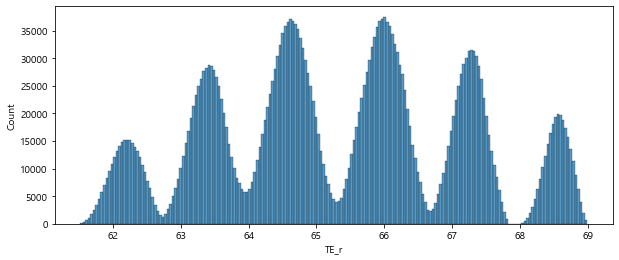

In [12]:
_, ax = plt.subplots(figsize=(10,4))
sns.histplot(data = y)

y.value_counts().sort_index()# XGBClassfier 모델

# Train Test dataset 분리

In [13]:
from sklearn.model_selection import train_test_split

X_rest, X_test, y_rest, y_test = train_test_split(X_data, y, random_state=1234)
X_train, X_valid, y_train, y_valid = train_test_split(X_rest, y_rest, random_state=1234)

# 모델 생성